Calculate Geospatial Weighted Averages from Monthly Time Series
===============================================================

Authors:

* [Tom Vo](https://github.com/tomvothecoder/)
* [Stephen Po-Chedley](https://github.com/pochedls/)

Date: 05/27/22

Related APIs:

* [xarray.Dataset.spatial.average()](../generated/xarray.Dataset.spatial.average.rst)

The data used in this example can be found through the [Earth System Grid Federation (ESGF) search portal](https://aims2.llnl.gov/metagrid/search).

## Overview

A common data reduction in geophysical sciences is to produce spatial averages. Spatial averaging functionality in xcdat allows users to quickly produce area-weighted spatial averages for selected regions (or full dataset domains).

In the example below, we demonstrate the opening of a (remote) dataset and spatial averaging over the global, tropical, and Niño 3.4 domains.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import xcdat


## 1. Open the `Dataset`

We are using xarray's OPeNDAP support to read a netCDF4 dataset file directly from its source. The data is not loaded over the network until we perform operations on it (e.g., temperature unit adjustment).

More information on the xarray's OpenDAP support can be found [here](https://docs.xarray.dev/en/stable/user-guide/io.html#opendap).

In [2]:
filepath = "http://esgf.nci.org.au/thredds/dodsC/master/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Amon/tas/gn/v20200605/tas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc"
ds = xcdat.open_dataset(filepath)

# Unit adjust (-273.15, K to C)
ds["tas"] = ds.tas - 273.15

ds

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height     float64 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 -27.19 -27.19 -27.19 ... -25.29 -25.29
Attributes: (12/49)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           87658.0
    creation_date:                   2020-06-05T04:06:11Z
    ...                              ...
    version:                         v20200605
    license:                         CMIP6 model data produced by CSIRO is li...
    cmor_version:                    3.4.0
    _NCProperties:                   version=2,netcdf=4.6.2,hdf5=1.10.5
    tracking_id:                     hdl:21.14100/af78ae5e-f3a6-4e99-8cfe-5f2...
    DODS_EXTRA.Unlimited_Dimension:  time

## 2. Global

In [3]:
ds_global_avg = ds.spatial.average("tas")

In [4]:
ds_global_avg.tas

<xarray.DataArray 'tas' (time: 1980)>
array([12.52127071, 13.09115223, 13.60703132, ..., 15.5767848 ,
       14.65664621, 13.84951678])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
    height   float64 2.0

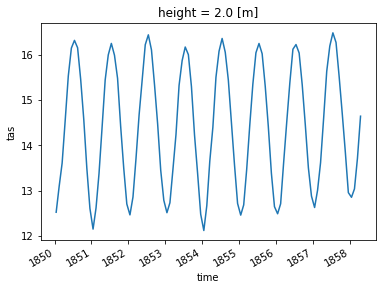

In [5]:
# Plot the first 100 time steps
ds_global_avg.tas.isel(time=slice(0, 100)).plot()

## 3. Tropical Region

In [6]:
ds_trop_avg = ds.spatial.average("tas", lat_bounds=(-25, 25))

In [7]:
ds_trop_avg.tas

<xarray.DataArray 'tas' (time: 1980)>
array([25.24722608, 25.61795924, 25.96516235, ..., 26.79536823,
       26.67771602, 26.27182383])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
    height   float64 2.0

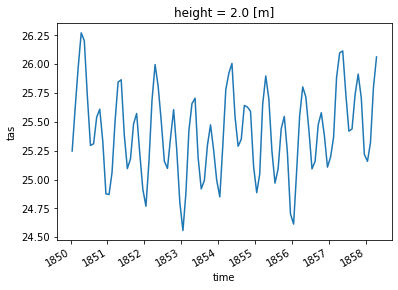

In [8]:
# Plot the first 100 time steps
ds_trop_avg.tas.isel(time=slice(0, 100)).plot()

## 4. Nino 3.4 Region

> Niño 3.4 (5N-5S, 170W-120W): The Niño 3.4 anomalies may be thought of as representing the average > equatorial SSTs across the Pacific from about the dateline to the South American coast. The Niño > 3.4 index typically uses a 5-month running mean, and El Niño or La Niña events are defined when > the Niño 3.4 SSTs exceed +/- 0.4C for a period of six months or more."
>
> &mdash; <cite>https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni</cite>


In [9]:
ds_nino_avg = ds.spatial.average("tas", lat_bounds=(-5, 5), lon_bounds=(190, 240))

In [10]:
ds_nino_avg.tas

<xarray.DataArray 'tas' (time: 1980)>
array([27.00284678, 27.06796429, 26.18095324, ..., 27.17515272,
       27.30917002, 27.38399379])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
    height   float64 2.0

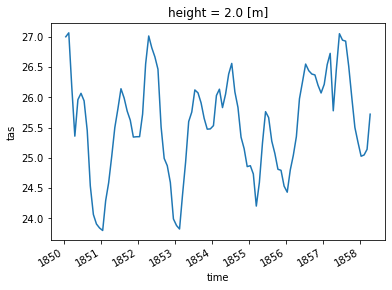

In [11]:
# Plot the first 100 time steps
ds_nino_avg.tas.isel(time=slice(0, 100)).plot()